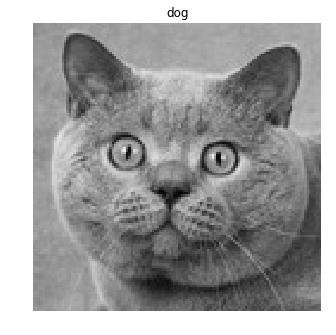

In [209]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from math import sin, cos, pi
from itertools import permutations
from collections import Counter

dog = plt.imread('./cat.jfif')[:, :, :3] / 255
# dog = plt.imread('/home/tongxueqing/zhaox/PythonSkills/ImageProcessing/dog.png')[:, :, :3]
dog = np.mean(dog, axis = 2, keepdims = False)
rotate = lambda a: np.array([[cos(a), sin(a), 0], [-sin(a), cos(a), 0], [0, 0, 1]])
height, width = dog.shape[:2]

def show(*plots, **kwargs):
    names = []
    dic = globals()
    for plot in plots:
        for key in dic:
            if key.startswith('_'):
                continue
            if dic[key] is plot:
                names.append(key)
    row = round(len(plots) ** 0.5)
    col = round(len(plots) / row)
    fig, axs = plt.subplots(row, col)
    plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0.2, wspace = 0.1)
    if isinstance(axs, matplotlib.axes._subplots.Axes):
        if np.max(plots[0]) > 1:
            vmax = 255
        else:
            vmax = 1
        axs.imshow(plots[0], cmap = 'gray', vmin = 0, vmax = vmax)
        axs.set_title(names[0])
        axs.axis('off')
    else:
        for i, ax in enumerate(axs.flatten()):
            if i < len(plots):
                if np.max(plots[i]) > 1:
                    vmax = 255
                else:
                    vmax = 1
                ax.imshow(plots[i], cmap = 'gray', vmin = 0, vmax = vmax)
                ax.set_title(names[i])
            ax.axis('off')
    plt.show()
show(dog)

In [207]:
def insertVal(xy, dog, mode = '4'):
    x, y = xy
    xi = int(x)
    yi = int(y)
    if mode == '4':
        if x % 1 == 0 and y % 1 == 0:
            return dog[xi, yi]
        elif x % 1 == 0:
            yi1 = yi + 1
            return (y - yi) * (dog[xi, yi1] - dog[xi, yi]) + dog[xi, yi]
        elif y % 1 == 0:
            xi1 = xi + 1
            return (x - xi) * (dog[xi1, yi] - dog[xi, yi]) + dog[xi, yi]
        else:
            A = np.array([[i, j, i * j, 1] for i in (xi, xi + 1) for j in (yi, yi + 1) if i < len(dog) and j < len(dog[0])])
            b = np.array([dog[i, j] for i, j in A[:, :2].tolist()])
            X = np.dot(np.dot(np.linalg.inv(np.dot(A.T, A)), A.T), b)
            return np.dot([x, y, x * y, 1], X)
    if mode == '1':
        if x % 1 == 0 and y % 1 == 0:
            return dog[xi, yi]
        elif x % 1 == 0:
            return dog[xi, yi] if y - yi < 0.5 else dog[xi, yi + 1]
        elif y % 1 == 0:
            return dog[xi, yi] if x - xi < 0.5 else dog[xi + 1, yi]
        else:
            xi = xi if x - xi < 0.5 else xi + 1
            yi = yi if y - yi < 0.5 else yi + 1
            return dog[xi, yi]
        
def rot(dog, angle, mode = '4'):
    height, width = dog.shape[:2]
    mapping = np.array([[np.dot(rotate(angle).T, np.reshape([v, w, 1], 3, 1))[:2] for w in range(width)] for v in range(height)])
    mapping[:, :, 0] = (height - 1) * (mapping[:, :, 0] - np.min(mapping[:, :, 0])) / np.ptp(mapping[:, :, 0])
    mapping[:, :, 1] = (width - 1) * (mapping[:, :, 1] - np.min(mapping[:, :, 1])) / np.ptp(mapping[:, :, 1])
    out = np.apply_along_axis(insertVal, 2, mapping, dog, mode)
    return out

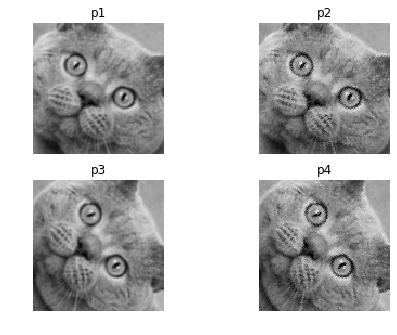

In [210]:
p1 = rot(dog, pi / 6)
p2 = rot(dog, pi / 6, mode = '1')
p3 = rot(dog, pi / 3)
p4 = rot(dog, pi / 3, mode = '1')

show(p1, p2, p3, p4)

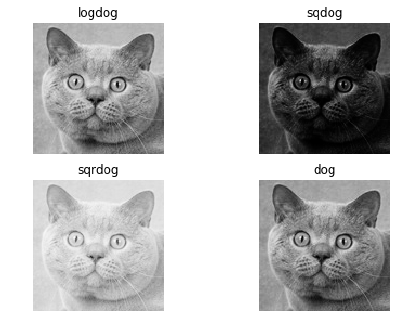

In [211]:
logdog = np.log2(dog + 1)
sqdog = dog ** 3        # 伽马变换
sqrdog = dog ** (1 / 3) # 伽马变换 
show(logdog, sqdog, sqrdog, dog)

IndexError: list index out of range

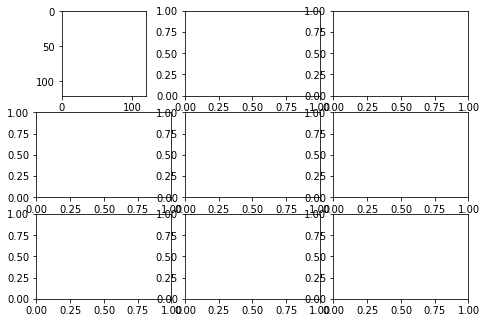

In [212]:
def getlayer(string, i):
    return eval(string[2 + i])

def binint(x):
    string = bin(np.int(x))[:10]
    if len(string) < 10:
        string = string + '0' * (10 - len(string))
    return string
        
getlayer = np.vectorize(getlayer)
binint = np.vectorize(binint)
vecEval = np.vectorize(eval)

bindog = np.round(255 * dog)
bindog = binint(bindog)
show(*[getlayer(bindog, l) for l in range(8)])

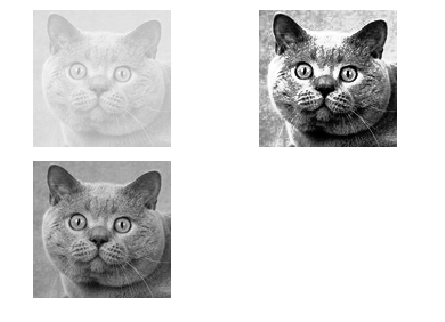

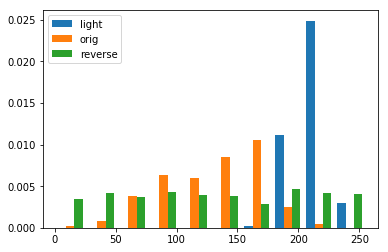

In [193]:
def transform(i, sums):
    return 255 * sum(sums[j] for j in range(int(i) + 1)) / (width * height)
transform = np.vectorize(transform)

dog256 = np.round(255 * dog)
doglight = np.round((dog256 + 2 * 255) / 3)
sums = Counter(doglight.flatten())
dogreverse = transform(doglight, sums)
show(doglight, dogreverse, dog)
plt.hist([doglight.flatten(), dog256.flatten(), dogreverse.flatten()], label = ['light', 'orig', 'reverse'])
plt.legend()
plt.show()

dict_keys(['__name__', '__doc__', '__package__', '__loader__', '__spec__', '__builtin__', '__builtins__', '_ih', '_oh', '_dh', 'In', 'Out', 'get_ipython', 'exit', 'quit', '_', '__', '___', '_i', '_ii', '_iii', '_i1', 'np', 'matplotlib', 'plt', 'sin', 'cos', 'pi', 'permutations', '_i2', 'dog', 'rotate', 'height', 'width', 'show', '_i3', 'dog256', '_i4', '_i5', '_i6', '_i7', '_i8', '_8', '_i9', '_i10', '_i11', '_i12', '_i13', '_i14', '_14', '_i15', '_i16', '_i17', '_i18', '_18', '_i19', '_19', '_i20', '_i21', '_i22', 'binint', '_i23', '_23', '_i24', '_24', '_i25', '_i26', '_i27', '_i28', '_28', '_i29', '_29', '_i30', '_i31', '_31', '_i32', '_32', '_i33', '_33', '_i34', '_34', '_i35', '_i36', '_i37', '_37', '_i38', '_i39', 'vecEval', 'bindog', '_39', '_i40', '_i41', 'getchar', 'l', 'layer0', '_i42', '_i43', 'layer1', 'layer2', '_i44', '_i45', '_i46', 'layer3', 'layer4', 'layer5', 'layer6', 'layer7', '_i47', '_i48', '_i49', '_i50', '_i51', '_i52', '_i53', '_i54', '_i55', '_i56', '_56', '_i